In [1]:
import pandas as pd
import numpy as np
import arviz as az

In [2]:
df_ethiopia = pd.read_excel(r'alldatasets.xlsx',sheet_name='Ethiopia')

In [3]:
df_ethiopia.head()

,childid,country,height,stunting_2cat,EDUYRS2,z_score,timeschool,agegapr1,momeduyrsr1,chsexr1,agemonr1,hhsizer1,wi_newr1,job_cat,pvt_sector,earn,earn_usd
0,ET011003,Ethiopia,157.0,0.0,16.5,1.379536,15.0,9.0,12.0,0,99,7,0.524603,5,1,2000.0,92.032104
1,ET011004,Ethiopia,174.0,NaN,10.0,-0.092591,30.0,10.0,6.0,1,90,8,0.473611,3,1,32000.0,1472.513672
2,ET011009,Ethiopia,155.0,0.0,12.5,1.785974,30.0,14.0,8.0,0,90,13,0.562821,5,1,7000.0,322.112366
3,ET011010,Ethiopia,153.5,0.0,12.0,1.803539,30.0,NaN,NaN,0,91,3,0.320370,5,1,3600.0,165.657791
4,ET011014,Ethiopia,169.0,0.0,10.0,0.893750,45.0,3.0,0.0,1,99,6,0.409259,3,1,43200.0,1987.893433


In [4]:
df_ethiopia.columns

Index(['childid', 'country', 'height', 'stunting_2cat', 'EDUYRS2', 'z_score',
       'timeschool', 'agegapr1', 'momeduyrsr1', 'chsexr1', 'agemonr1',
       'hhsizer1', 'wi_newr1', 'job_cat', 'pvt_sector', 'earn', 'earn_usd'],
      dtype='object')

In [5]:
from scipy import stats
import scipy.stats as stats

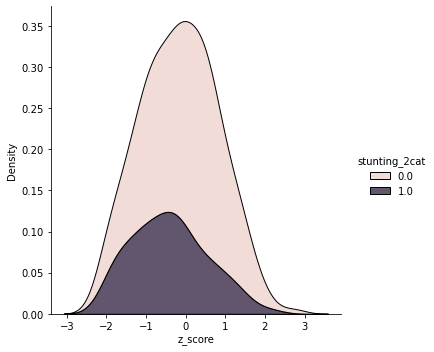

In [6]:
import seaborn as sns
sns.displot(df_ethiopia, x="z_score", hue="stunting_2cat", kind="kde", multiple="stack")

# Bayesian

In [7]:
Y = df_ethiopia[['height']]
X = df_ethiopia[['stunting_2cat']]

In [8]:
formula = 'height ~ ' + ' + '.join(['%s' % variable for variable in X.columns[0:]])
formula

'height ~ stunting_2cat'

In [9]:
import warnings
warnings.filterwarnings("ignore")

In [10]:
import pymc3 as pm

# Context for the model
with pm.Model() as normal_model:
    
    my_priors= {
        'Intercept': pm.Normal.dist(mu=164.2, sigma=10.),
        'stunting_2cat': pm.Normal.dist(mu=1, sigma=5.8)        
    }
    
    
    
    # Creating the model requires a formula and data (and optionally a family)
    pm.GLM.from_formula(formula, data = df_ethiopia, priors=my_priors)
    
    # Perform Markov Chain Monte Carlo sampling letting PyMC3 choose the algorithm
    normal_trace = pm.sample(draws=3000, chains = 2, tune = 4000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [sd, stunting_2cat, Intercept]


Sampling 2 chains for 4_000 tune and 3_000 draw iterations (8_000 + 6_000 draws total) took 21 seconds.


In [11]:
az.summary(normal_trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
Intercept,167.496,0.429,166.678,168.303,0.007,0.005,3584.0,3584.0,3583.0,3508.0,1.0
stunting_2cat,-4.171,0.737,-5.562,-2.803,0.012,0.009,3587.0,3584.0,3589.0,4228.0,1.0
sd,8.180,0.243,7.723,8.622,0.003,0.002,5815.0,5815.0,5754.0,3938.0,1.0


array([[<AxesSubplot:title={'center':'Intercept'}>,
        <AxesSubplot:title={'center':'Intercept'}>],
       [<AxesSubplot:title={'center':'stunting_2cat'}>,
        <AxesSubplot:title={'center':'stunting_2cat'}>],
       [<AxesSubplot:title={'center':'sd'}>,
        <AxesSubplot:title={'center':'sd'}>]], dtype=object)

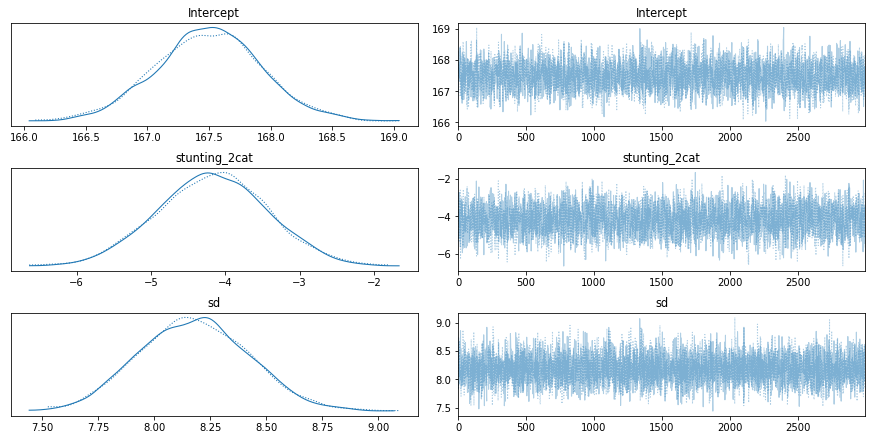

In [12]:
az.plot_trace(normal_trace)

In [13]:
Y = df_ethiopia['height']
X = df_ethiopia[['stunting_2cat', 'agegapr1', 'momeduyrsr1', 'chsexr1', 'agemonr1','wi_newr1',
       'hhsizer1']]

In [14]:
formula = 'height ~ ' + ' + '.join(['%s' % variable for variable in X.columns[0:]])
formula

'height ~ stunting_2cat + agegapr1 + momeduyrsr1 + chsexr1 + agemonr1 + wi_newr1 + hhsizer1'

In [15]:
import warnings
warnings.filterwarnings("ignore")

In [22]:
import pymc3 as pm

# Context for the model
with pm.Model() as normal_model:
    
    my_priors= {
        'Intercept': pm.Normal.dist(mu=164.2, sigma=10),
        'stunting_2cat': pm.Normal.dist(mu=1, sigma=5.8),
        'agegapr1': pm.Normal.dist(mu=1, sigma=5.8),
        'momeduyrsr1': pm.Normal.dist(mu=1, sigma=5.8),
        'chsexr1': pm.Normal.dist(mu=1, sigma=5.8),
        'agemonr1': pm.Normal.dist(mu=1, sigma=5.8),
        'wi_newr1': pm.Normal.dist(mu=1, sigma=5.8),
        'hhsizer1': pm.Normal.dist(mu=1, sigma=5.8) 
    }
    
    
    
    # Creating the model requires a formula and data (and optionally a family)
    pm.GLM.from_formula(formula, data = df_ethiopia, priors=my_priors)
    
    # Perform Markov Chain Monte Carlo sampling letting PyMC3 choose the algorithm
    normal_trace = pm.sample(draws=10000, chains = 2, tune = 2000,target_accept=0.95)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [sd, hhsizer1, wi_newr1, agemonr1, chsexr1, momeduyrsr1, agegapr1, stunting_2cat, Intercept]


Sampling 2 chains for 2_000 tune and 10_000 draw iterations (4_000 + 20_000 draws total) took 234 seconds.


In [23]:
az.summary(normal_trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
Intercept,157.912,6.087,146.435,169.328,0.053,0.038,12976.0,12976.0,12981.0,12502.0,1.0
stunting_2cat,-4.725,0.605,-5.883,-3.598,0.004,0.003,26545.0,26067.0,26618.0,13578.0,1.0
agegapr1,-0.029,0.044,-0.112,0.053,0.000,0.000,22137.0,11629.0,22200.0,14145.0,1.0
momeduyrsr1,0.041,0.112,-0.174,0.246,0.001,0.001,18225.0,11917.0,18239.0,14727.0,1.0
chsexr1,11.686,0.569,10.618,12.750,0.003,0.002,27540.0,27540.0,27556.0,14898.0,1.0
agemonr1,0.025,0.064,-0.097,0.146,0.001,0.000,12818.0,10222.0,12838.0,12591.0,1.0
wi_newr1,0.834,1.785,-2.500,4.226,0.013,0.011,18483.0,12679.0,18474.0,15019.0,1.0
hhsizer1,0.127,0.153,-0.156,0.417,0.001,0.001,25919.0,14390.0,25944.0,13645.0,1.0
sd,5.768,0.202,5.383,6.143,0.001,0.001,25906.0,25748.0,26065.0,14007.0,1.0


array([[<AxesSubplot:title={'center':'Intercept'}>,
        <AxesSubplot:title={'center':'Intercept'}>],
       [<AxesSubplot:title={'center':'stunting_2cat'}>,
        <AxesSubplot:title={'center':'stunting_2cat'}>],
       [<AxesSubplot:title={'center':'agegapr1'}>,
        <AxesSubplot:title={'center':'agegapr1'}>],
       [<AxesSubplot:title={'center':'momeduyrsr1'}>,
        <AxesSubplot:title={'center':'momeduyrsr1'}>],
       [<AxesSubplot:title={'center':'chsexr1'}>,
        <AxesSubplot:title={'center':'chsexr1'}>],
       [<AxesSubplot:title={'center':'agemonr1'}>,
        <AxesSubplot:title={'center':'agemonr1'}>],
       [<AxesSubplot:title={'center':'wi_newr1'}>,
        <AxesSubplot:title={'center':'wi_newr1'}>],
       [<AxesSubplot:title={'center':'hhsizer1'}>,
        <AxesSubplot:title={'center':'hhsizer1'}>],
       [<AxesSubplot:title={'center':'sd'}>,
        <AxesSubplot:title={'center':'sd'}>]], dtype=object)

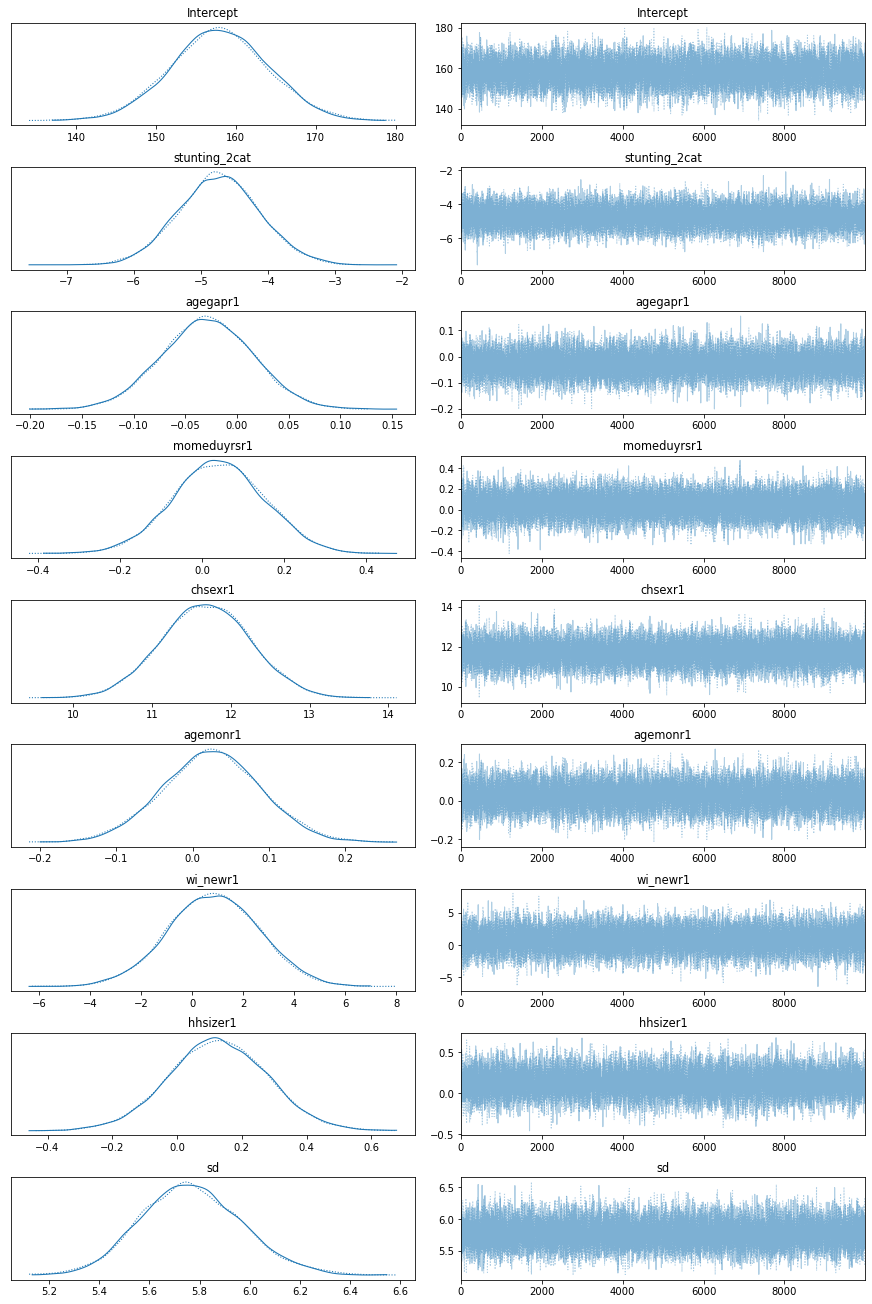

In [24]:
az.plot_trace(normal_trace)

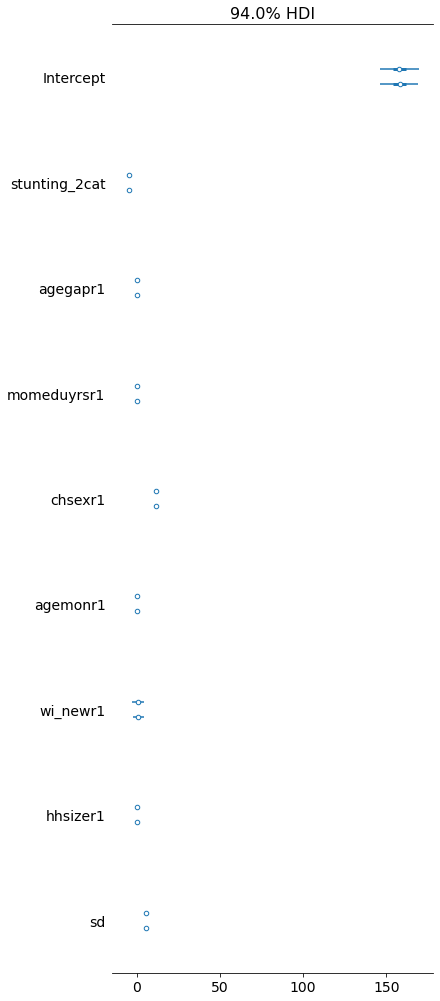

In [25]:
az.plot_forest(normal_trace);